# ThaiEPS Talk #007, 8.8.2020: <br><br>Introduction to NetCDF Data Crunching with Python's Xarray

Speaker: Phadtaya Poemnamthip, Graduate student, MIT-WHOI Joint Program in Oceanography<br><br>Date: 8/8/2020<br><br>CC BY-SA 4.0

## Outline
- Python installation
- (CMIP6 Dataset downloading/opening)
- Data analysis and plotting

## 0. Preamble

Some useful websites to learn Python basics:
- Official tutorial: https://docs.python.org/3/tutorial/index.html
- Online lecture notes by my first Python teacher (Dr. Fabien Maussion, University of Innsbruck): https://fabienmaussion.info/scientific_programming/html/00-Introduction.html

A good place to learn Big Data Geoscience:
- https://pangeo.io/

## 1. Installing Python via Miniconda

- Download Miniconda installer (see instructions on the website)
- Create Python environment

In [1]:
# Let's get start!
# Import packages we need:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import fsspec

import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list

In [2]:
%matplotlib inline

## 2. Dataset downloading <br>
## Today's data: Some NCAR CMIP6 Datasets (Method from Pangeo.io)

If you already have your own NetCDF dataset, you can open it by:

Now: Let's use a CMIP6 dataset from Google Cloud data
- Reference of this section: Pangeo gallery, http://gallery.pangeo.io/repos/pangeo-gallery/cmip6/basic_search_and_load.html
(Please refer to the link to learn more about available datasets and how to access/download them)
- Learn more about keywords in Pangeo CMIP6 Google Cloud Data: https://docs.google.com/document/d/1yUx6jr9EdedCOLd--CPdTfGDwEwzPpCF6p1jRmqx-0Q/edit

CMIP: Coupled Model Intercomparison Project

In [3]:
# Open the .csv catalog by pandas pkg
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df.head()

/Users/ppoem/miniconda3/envs/py3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,AerChemMIP,AS-RCEC,TaiESM1,histSST,r1i1p1f1,AERmon,od550aer,gn,gs://cmip6/AerChemMIP/AS-RCEC/TaiESM1/histSST/...,NaN,20200310
1,AerChemMIP,BCC,BCC-ESM1,histSST,r1i1p1f1,AERmon,mmrbc,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/histSST/r1i...,NaN,20190718
2,AerChemMIP,BCC,BCC-ESM1,histSST,r1i1p1f1,AERmon,mmrdust,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/histSST/r1i...,NaN,20191127
3,AerChemMIP,BCC,BCC-ESM1,histSST,r1i1p1f1,AERmon,mmroa,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/histSST/r1i...,NaN,20190809
4,AerChemMIP,BCC,BCC-ESM1,histSST,r1i1p1f1,AERmon,mmrso4,gn,gs://cmip6/AerChemMIP/BCC/BCC-ESM1/histSST/r1i...,NaN,20191127


In [4]:
# use "query" to search for a variable
# In this example: Search for
df_ta = df.query("activity_id=='CMIP' & table_id == 'Amon' & variable_id == 'tas' & experiment_id == 'historical' & institution_id == 'NCAR'")
df_ta

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
56766,CMIP,NCAR,CESM2-FV2,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2-FV2/historical/r1i1...,NaN,20191120
57075,CMIP,NCAR,CESM2-FV2,historical,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2-FV2/historical/r2i1...,NaN,20200226
57187,CMIP,NCAR,CESM2-FV2,historical,r3i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2-FV2/historical/r3i1...,NaN,20200226
57545,CMIP,NCAR,CESM2-WACCM-FV2,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2-WACCM-FV2/historica...,NaN,20191120
57834,CMIP,NCAR,CESM2-WACCM-FV2,historical,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2-WACCM-FV2/historica...,NaN,20200226
57952,CMIP,NCAR,CESM2-WACCM-FV2,historical,r3i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2-WACCM-FV2/historica...,NaN,20200226
58868,CMIP,NCAR,CESM2-WACCM,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2-WACCM/historical/r1...,NaN,20190227
59263,CMIP,NCAR,CESM2-WACCM,historical,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2-WACCM/historical/r2...,NaN,20190227
59565,CMIP,NCAR,CESM2-WACCM,historical,r3i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2-WACCM/historical/r3...,NaN,20190227
60977,CMIP,NCAR,CESM2,historical,r10i1p1f1,Amon,tas,gn,gs://cmip6/CMIP/NCAR/CESM2/historical/r10i1p1f...,NaN,20190313


In [5]:
# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_ta.zstore.values[-1]
print(zstore)

gs://cmip6/CMIP/NCAR/CESM2/historical/r9i1p1f1/Amon/tas/gn/


In [6]:
# create a "mutable-mapping-style" interface to the store
mapper = fsspec.get_mapper(zstore)

In [7]:
# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True)
ds

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, nbnd: 2, time: 1980)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float32 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float32 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 dask.array<chunksize=(600, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  295650.0
    case_id:                23
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.009
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-27T10:42:54Z
    data_specs_version:     01.00.29
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacella
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.h...
    grid:                   native 0.9x1.25 finite volume grid (192x288 latxlon)
    grid_label:             gn
    history:                none
    initialization_index:   1
    institution:            National Center for Atmospheric Research, Climate...
    institution_id:         NCAR
    license:                CMIP6 model data produced by <The National Center...
    mip_era:                CMIP6
    model_doi_url:          https://doi.org/10.5065/D67H1H0V
    nominal_resolution:     100 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       CESM2
    parent_time_units:      days since 0001-01-01 00:00:00
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      9
    realm:                  atmos
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    source_id:              CESM2
    source_type:            AOGCM BGC
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Amon
    tracking_id:            hdl:21.14100/4b164514-1627-4deb-a8d5-93d4c5166d41...
    variable_id:            tas
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r9i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu

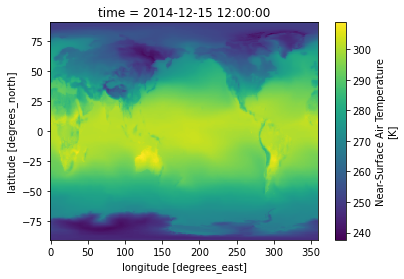

In [8]:
# First plot
ds.tas.sel(time=ds.time[-1]).plot();

## 3. Data analysis

### Example 1: All-time average and plotting

In [9]:
# default plot size
plt.rcParams['figure.figsize'] = (14, 8)

In [10]:
tas_avg = ds.tas.mean(dim='time')

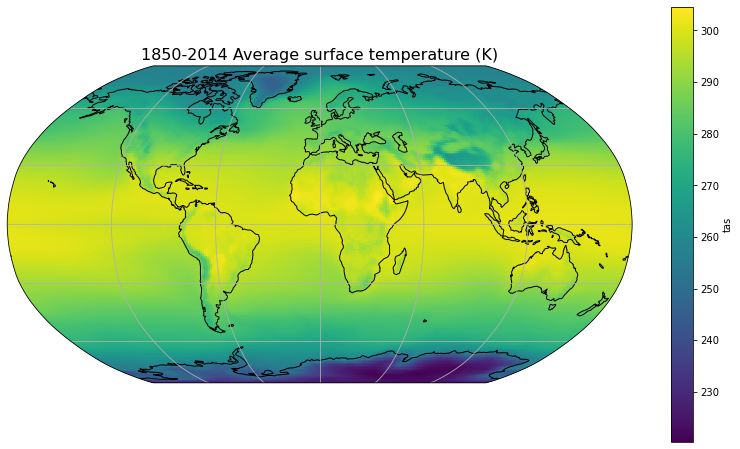

In [11]:
ax = plt.axes(projection=ccrs.Robinson())
tas_avg.plot(ax=ax, transform=ccrs.PlateCarree()) 
ax.coastlines(); ax.gridlines();
ax.set_title('1850-2014 Average surface temperature (K)', fontsize = 16);

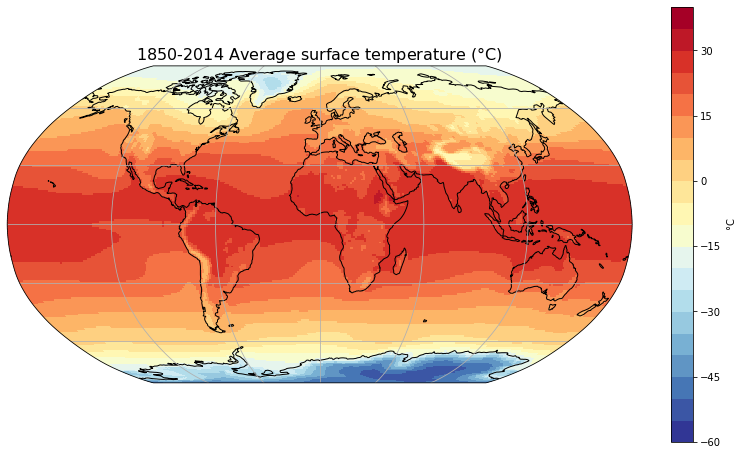

In [12]:
# Convert to degree Celcius
tas_avg_c = tas_avg - 273.15

# Plot customization
ax = plt.axes(projection=ccrs.Robinson())
tas_avg_c.plot(ax=ax, transform=ccrs.PlateCarree(),cmap ='RdYlBu_r',levels=np.linspace(-60,40,21),center=False,cbar_kwargs={'label':'$\degree$C'}) 
ax.coastlines(); ax.gridlines();
ax.set_title('1850-2014 Average surface temperature ($\degree$C)', fontsize = 16);

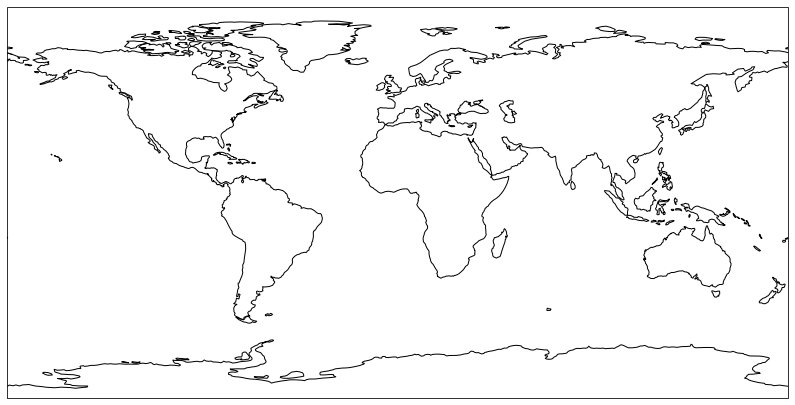

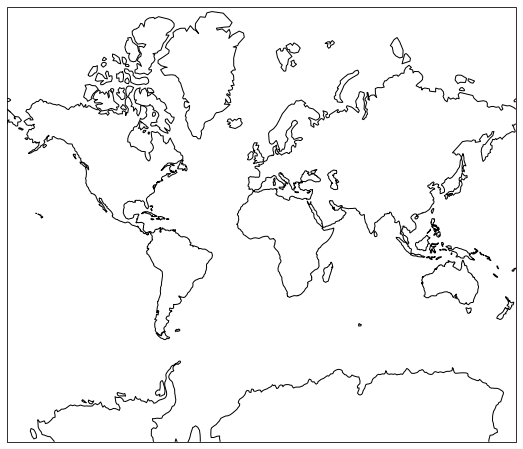

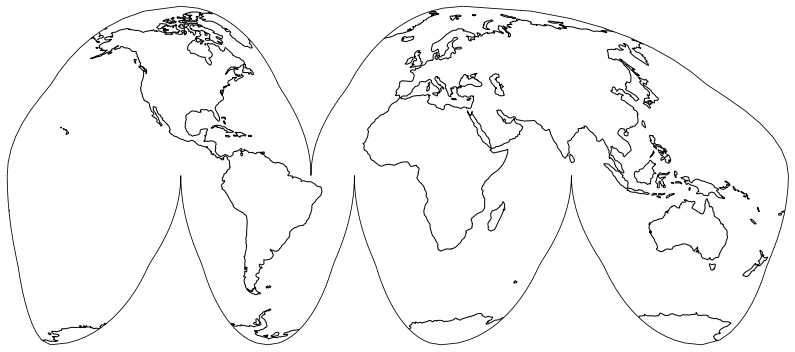

In [13]:
# Bonus: More map projection from Cartopy
# See more: https://scitools.org.uk/cartopy/docs/latest/crs/projections.html#interruptedgoodehomolosine
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
plt.show()

ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines()
plt.show()

ax = plt.axes(projection=ccrs.InterruptedGoodeHomolosine())
ax.coastlines()
plt.show()

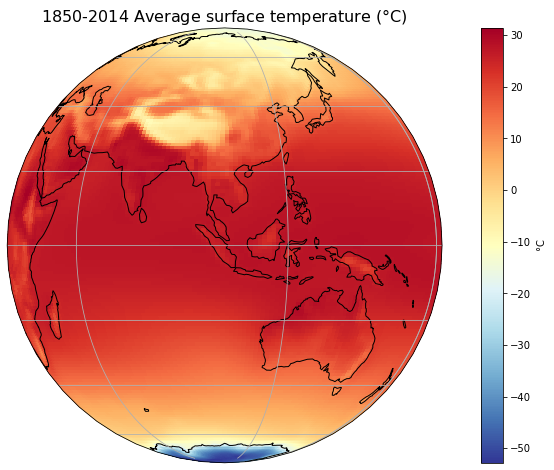

In [14]:
# Remark: Difference between "projection" and "transform"
# Example
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=103.0, central_latitude=0.0))
tas_avg_c.plot(ax=ax, transform=ccrs.PlateCarree(),cmap ='RdYlBu_r',center=False,cbar_kwargs={'label':'$\degree$C'}) 
ax.coastlines(); ax.gridlines();
ax.set_title('1850-2014 Average surface temperature ($\degree$C)', fontsize = 16);

### Example 2: Coordinate-area weighting of the data & plotting of time series

Since the area each latitude circle enclosed is inequal --> weight them!
<br>2.1 Weight manually
<br>2.2 Use the "areacella" data array


#### 2.1 Weight manually

In [15]:
weight = np.cos(np.deg2rad(ds.lat))
weight = weight / weight.sum()

In [16]:
# We've normalized the weight, so the sum should be 1.
weight.sum()

<xarray.DataArray 'lat' ()>
array(1.)

In [17]:
# Regular mean works with zonal avg. (Each longitude line is half of a great circle.)
zonal_avg_tas = ds.tas.mean(dim='lon')
zonal_avg_tas

<xarray.DataArray 'tas' (time: 1980, lat: 192)>
dask.array<mean_agg-aggregate, shape=(1980, 192), dtype=float32, chunksize=(600, 192), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * time     (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00

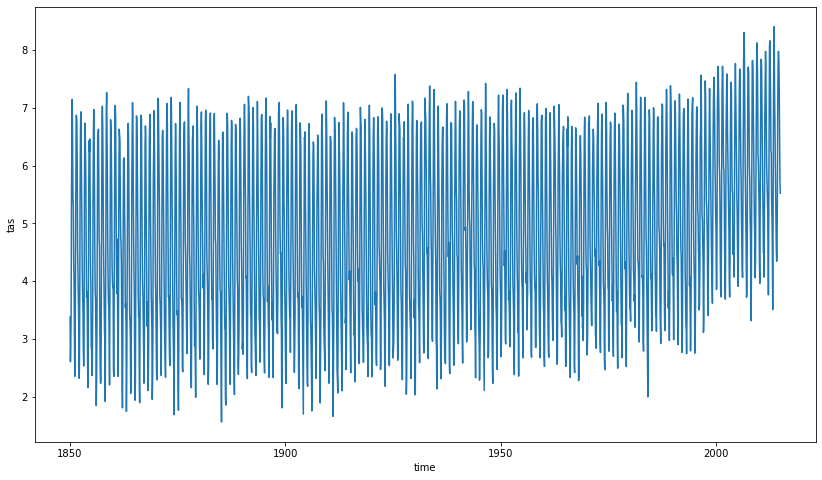

In [18]:
tas_avg_noweight = zonal_avg_tas.mean(dim='lat')
tas_avg_noweight_c = tas_avg_noweight - 273.15
tas_avg_noweight_c.plot();

In [19]:
# With weight
tas_avg_weight = zonal_avg_tas*weight

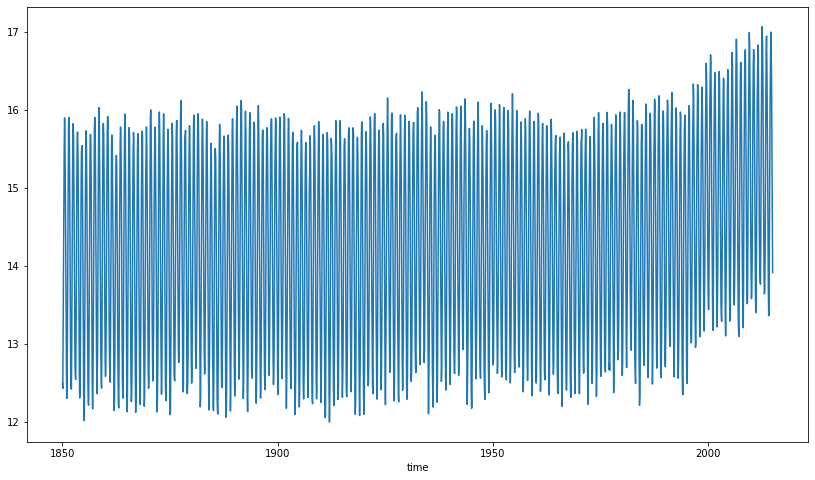

In [20]:
tas_avg_weight = tas_avg_weight.sum(dim='lat')
tas_avg_weight_c = tas_avg_weight - 273.15
tas_avg_weight_c.plot();

In [21]:
tas_ww_as = tas_avg_weight_c.resample(time='AS').mean()
tas_ww_a = tas_avg_weight_c.resample(time='A').mean()

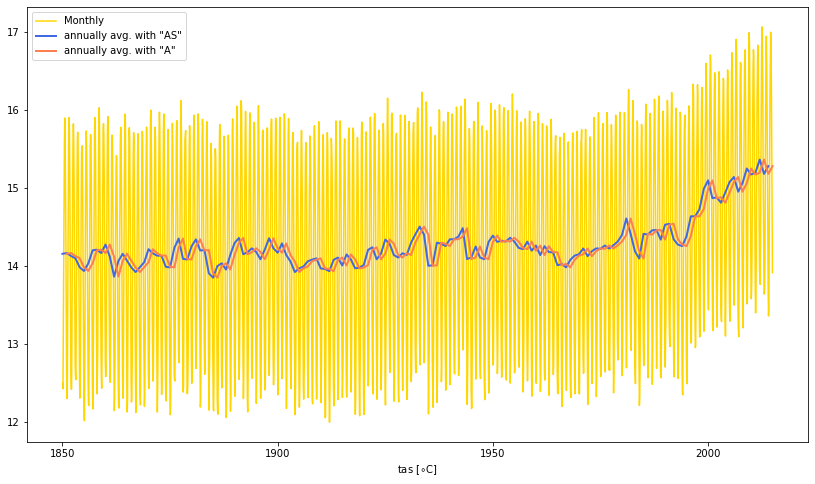

In [22]:
tas_avg_weight_c.plot(color='gold',label='Monthly');
tas_ww_as.plot(c='royalblue',label='annually avg. with "AS"',lw=2);
tas_ww_a.plot(c='coral',label='annually avg. with "A"',lw=2);
plt.xlabel('tas [$\circ$C]')
plt.legend();

#### 2.2 Use the "areacella" data array (Source: http://gallery.pangeo.io/repos/pangeo-gallery/cmip6/basic_search_and_load.html)

In [23]:
#import nc_time_axis
import cftime

In [24]:
df_area = df.query("variable_id == 'areacella' & source_id == 'CESM2'")
ds_area = xr.open_zarr(fsspec.get_mapper(df_area.zstore.values[0]), consolidated=True)
ds_area

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    areacella  (lat, lon) float32 dask.array<chunksize=(192, 288), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CFMIP
    branch_method:          no parent
    branch_time_in_child:   721970.0
    branch_time_in_parent:  0.0
    case_id:                965
    cesm_casename:          f.e21.FHIST_BGC.f09_f09_mg17.CFMIP-amip-4xCO2.001
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-03-13T22:41:31Z
    data_specs_version:     01.00.29
    experiment:             Continuation of CFMIP-2 AMIP experiments and CMIP...
    experiment_id:          amip-4xCO2
    forcing_index:          1
    frequency:              fx
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.a...
    grid:                   native 0.9x1.25 finite volume grid (192x288 latxlon)
    grid_label:             gn
    initialization_index:   1
    institution:            National Center for Atmospheric Research, Climate...
    institution_id:         NCAR
    license:                CMIP6 model data produced by <The National Center...
    mip_era:                CMIP6
    model_doi_url:          https://doi.org/10.5065/D67H1H0V
    nominal_resolution:     100 km
    parent_activity_id:     no parent
    parent_experiment_id:   no parent
    parent_mip_era:         no parent
    parent_source_id:       no parent
    parent_time_units:      no parent
    parent_variant_label:   no parent
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  atmos land
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    source_id:              CESM2
    source_type:            AGCM AER
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               fx
    tracking_id:            hdl:21.14100/35b69461-eb69-4a58-b2f7-413dbf2cd8fe
    variable_id:            areacella
    variant_info:           The same as the amip experiment within DECK, exce...
    variant_label:          r1i1p1f1
    status:                 2019-11-04;created;by nhn2@columbia.edu

In [25]:
total_area = ds_area.areacella.sum()
ta_timeseries = (ds.tas * ds_area.areacella).sum(dim=['lon', 'lat']) / total_area
ta_timeseries

<xarray.DataArray (time: 1980)>
dask.array<truediv, shape=(1980,), dtype=float32, chunksize=(600,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00

In [26]:
%time ta_timeseries.load()

CPU times: user 2.54 s, sys: 1.1 s, total: 3.64 s
Wall time: 24.8 s


<xarray.DataArray (time: 1980)>
array([285.6408 , 285.57397, 286.33856, ..., 288.6992 , 287.76303,
       287.0621 ], dtype=float32)
Coordinates:
  * time     (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00

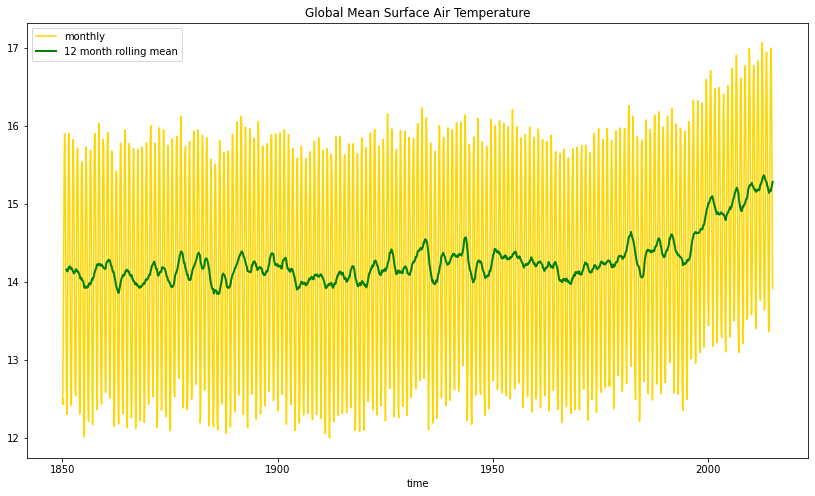

In [27]:
ta_timeseries_c = ta_timeseries - 273.15
tas_areacella_yrroll = ta_timeseries_c.rolling(time=12).mean()
ta_timeseries_c.plot(label='monthly',color ='gold')
tas_areacella_yrroll.plot(label='12 month rolling mean',color='green',lw=2)
plt.legend()
plt.title('Global Mean Surface Air Temperature');

### Compariason between 2 weighting methods

In [28]:
tas_areacella_as = ta_timeseries_c.resample(time='AS').mean()
tas_areacella_a = ta_timeseries_c.resample(time='A').mean()

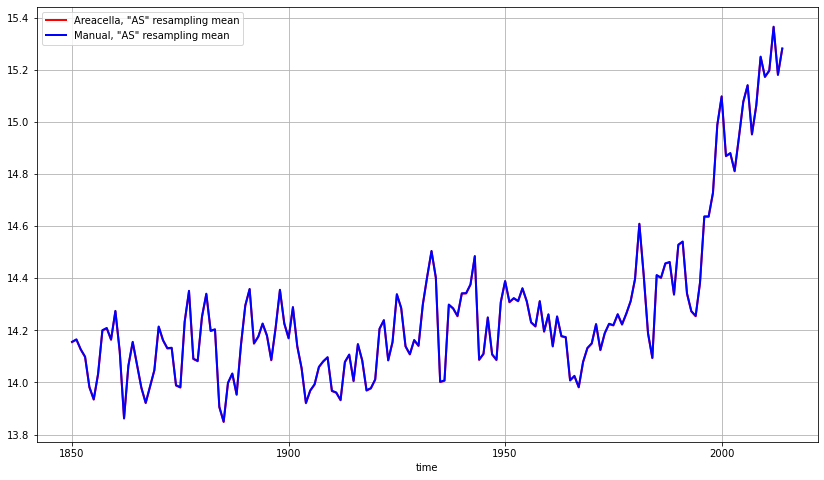

In [29]:
tas_areacella_as.plot(label='Areacella, "AS" resampling mean',color='red',lw=2)
tas_ww_as.plot(c='blue',label='Manual, "AS" resampling mean',lw=2);
plt.legend();
plt.grid();

### resample vs rolling

In [30]:
tas_areacella_a.shape

(165,)

In [31]:
tas_areacella_yrroll.shape

(1980,)

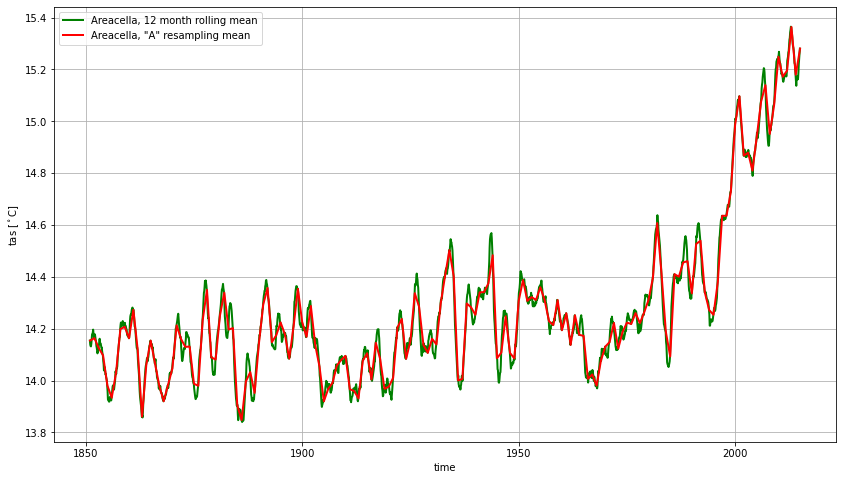

In [32]:
tas_areacella_yrroll.plot(label='Areacella, 12 month rolling mean',color='green',lw=2)
tas_areacella_a.plot(label='Areacella, "A" resampling mean',color='red',lw=2)
plt.ylabel('tas [$^\circ$C]')
plt.legend();
plt.grid();

Explanation?
- https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html
- Any idea?

### Example 3: Data slicing and grouping

Now loading a pressure at sea level dataset. One way to look up for the CMIP's variable id: click on "Spreadsheet view of the variable definitions" on https://earthsystemcog.org/projects/wip/CMIP6DataRequest . The variable id of the sea level pressure is "psl".

In [33]:
# Looking for sea-level pressure dataset
# use "query" to search for a variable
# In this example: Search for
df_psl = df.query("activity_id=='CMIP' & table_id == 'Amon' & variable_id == 'psl' & experiment_id == 'historical' & institution_id == 'NCAR'")
df_psl

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
56756,CMIP,NCAR,CESM2-FV2,historical,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP/NCAR/CESM2-FV2/historical/r1i1...,NaN,20191120
57070,CMIP,NCAR,CESM2-FV2,historical,r2i1p1f1,Amon,psl,gn,gs://cmip6/CMIP/NCAR/CESM2-FV2/historical/r2i1...,NaN,20200226
57182,CMIP,NCAR,CESM2-FV2,historical,r3i1p1f1,Amon,psl,gn,gs://cmip6/CMIP/NCAR/CESM2-FV2/historical/r3i1...,NaN,20200226
57535,CMIP,NCAR,CESM2-WACCM-FV2,historical,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP/NCAR/CESM2-WACCM-FV2/historica...,NaN,20191120
57829,CMIP,NCAR,CESM2-WACCM-FV2,historical,r2i1p1f1,Amon,psl,gn,gs://cmip6/CMIP/NCAR/CESM2-WACCM-FV2/historica...,NaN,20200226
57947,CMIP,NCAR,CESM2-WACCM-FV2,historical,r3i1p1f1,Amon,psl,gn,gs://cmip6/CMIP/NCAR/CESM2-WACCM-FV2/historica...,NaN,20200226
58856,CMIP,NCAR,CESM2-WACCM,historical,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP/NCAR/CESM2-WACCM/historical/r1...,NaN,20190227
59251,CMIP,NCAR,CESM2-WACCM,historical,r2i1p1f1,Amon,psl,gn,gs://cmip6/CMIP/NCAR/CESM2-WACCM/historical/r2...,NaN,20190227
59553,CMIP,NCAR,CESM2-WACCM,historical,r3i1p1f1,Amon,psl,gn,gs://cmip6/CMIP/NCAR/CESM2-WACCM/historical/r3...,NaN,20190227
60965,CMIP,NCAR,CESM2,historical,r10i1p1f1,Amon,psl,gn,gs://cmip6/CMIP/NCAR/CESM2/historical/r10i1p1f...,NaN,20190313


In [34]:
zstore_psl = df_psl.zstore.values[-1]
mapper_psl = fsspec.get_mapper(zstore_psl)

ds_psl = xr.open_zarr(mapper_psl, consolidated=True)

In [35]:
ds_psl

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, nbnd: 2, time: 1980)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float32 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float32 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    psl        (time, lat, lon) float32 dask.array<chunksize=(600, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  295650.0
    case_id:                23
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.009
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-27T12:19:20Z
    data_specs_version:     01.00.29
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacella
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.h...
    grid:                   native 0.9x1.25 finite volume grid (192x288 latxlon)
    grid_label:             gn
    history:                none
    initialization_index:   1
    institution:            National Center for Atmospheric Research, Climate...
    institution_id:         NCAR
    license:                CMIP6 model data produced by <The National Center...
    mip_era:                CMIP6
    model_doi_url:          https://doi.org/10.5065/D67H1H0V
    nominal_resolution:     100 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       CESM2
    parent_time_units:      days since 0001-01-01 00:00:00
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      9
    realm:                  atmos
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    source_id:              CESM2
    source_type:            AOGCM BGC
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Amon
    tracking_id:            hdl:21.14100/df85a0a4-ce4f-4f46-a15f-ec1b426e2f65...
    variable_id:            psl
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r9i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu

### Select a specific period of time

In [36]:
psl_2012 = ds_psl.sel(time='2012')
psl_2012

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, nbnd: 2, time: 12)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float32 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float32 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 2012-01-15 12:00:00 ... 2012-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(12, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    psl        (time, lat, lon) float32 dask.array<chunksize=(12, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  295650.0
    case_id:                23
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.009
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-27T12:19:20Z
    data_specs_version:     01.00.29
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacella
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.h...
    grid:                   native 0.9x1.25 finite volume grid (192x288 latxlon)
    grid_label:             gn
    history:                none
    initialization_index:   1
    institution:            National Center for Atmospheric Research, Climate...
    institution_id:         NCAR
    license:                CMIP6 model data produced by <The National Center...
    mip_era:                CMIP6
    model_doi_url:          https://doi.org/10.5065/D67H1H0V
    nominal_resolution:     100 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       CESM2
    parent_time_units:      days since 0001-01-01 00:00:00
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      9
    realm:                  atmos
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    source_id:              CESM2
    source_type:            AOGCM BGC
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Amon
    tracking_id:            hdl:21.14100/df85a0a4-ce4f-4f46-a15f-ec1b426e2f65...
    variable_id:            psl
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r9i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu

In [37]:
psl_2012_Jul = ds_psl.sel(time='2012-07')
psl_2012_Jul

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, nbnd: 2, time: 1)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float32 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float32 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 2012-07-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    psl        (time, lat, lon) float32 dask.array<chunksize=(1, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  295650.0
    case_id:                23
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.009
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-27T12:19:20Z
    data_specs_version:     01.00.29
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacella
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.h...
    grid:                   native 0.9x1.25 finite volume grid (192x288 latxlon)
    grid_label:             gn
    history:                none
    initialization_index:   1
    institution:            National Center for Atmospheric Research, Climate...
    institution_id:         NCAR
    license:                CMIP6 model data produced by <The National Center...
    mip_era:                CMIP6
    model_doi_url:          https://doi.org/10.5065/D67H1H0V
    nominal_resolution:     100 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       CESM2
    parent_time_units:      days since 0001-01-01 00:00:00
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      9
    realm:                  atmos
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    source_id:              CESM2
    source_type:            AOGCM BGC
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Amon
    tracking_id:            hdl:21.14100/df85a0a4-ce4f-4f46-a15f-ec1b426e2f65...
    variable_id:            psl
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r9i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu

### Use slice to select years, e.g. 2001-2010

In [38]:
psl_2001_2010 = ds_psl.sel(time=slice('2001','2010'))

In [39]:
psl_2001_2010

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, nbnd: 2, time: 120)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float32 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float32 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 2001-01-15 12:00:00 ... 2010-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(120, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    psl        (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  295650.0
    case_id:                23
    cesm_casename:          b.e21.BHIST.f09_g17.CMIP6-historical.009
    contact:                cesm_cmip6@ucar.edu
    creation_date:          2019-01-27T12:19:20Z
    data_specs_version:     01.00.29
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacella
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.NCAR.CESM2.h...
    grid:                   native 0.9x1.25 finite volume grid (192x288 latxlon)
    grid_label:             gn
    history:                none
    initialization_index:   1
    institution:            National Center for Atmospheric Research, Climate...
    institution_id:         NCAR
    license:                CMIP6 model data produced by <The National Center...
    mip_era:                CMIP6
    model_doi_url:          https://doi.org/10.5065/D67H1H0V
    nominal_resolution:     100 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       CESM2
    parent_time_units:      days since 0001-01-01 00:00:00
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      9
    realm:                  atmos
    source:                 CESM2 (2017): atmosphere: CAM6 (0.9x1.25 finite v...
    source_id:              CESM2
    source_type:            AOGCM BGC
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Amon
    tracking_id:            hdl:21.14100/df85a0a4-ce4f-4f46-a15f-ec1b426e2f65...
    variable_id:            psl
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r9i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu

### Use "groupby" to group the same calendar month together

In [40]:
# Average of each calendar month from 2001-2010 (want to see annual cycle)
psl_mcy = psl_2001_2010.psl.groupby('time.month').mean()

In [41]:
psl_mcy

<xarray.DataArray 'psl' (month: 12, lat: 192, lon: 288)>
dask.array<stack, shape=(12, 192, 288), dtype=float32, chunksize=(1, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

/Users/ppoem/miniconda3/envs/py3/lib/python3.7/site-packages/xarray/plot/utils.py:624: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(primitive, **cbar_kwargs)
/Users/ppoem/miniconda3/envs/py3/lib/python3.7/site-packages/xarray/plot/utils.py:624: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(primitive, **cbar_kwargs)
/Users/ppoem/miniconda3/envs/py3/lib/python3.7/site-packages/xarray/plot/utils.py:624: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = fig.colorbar(primitive, **cbar_kwargs)
/Users/ppoem/

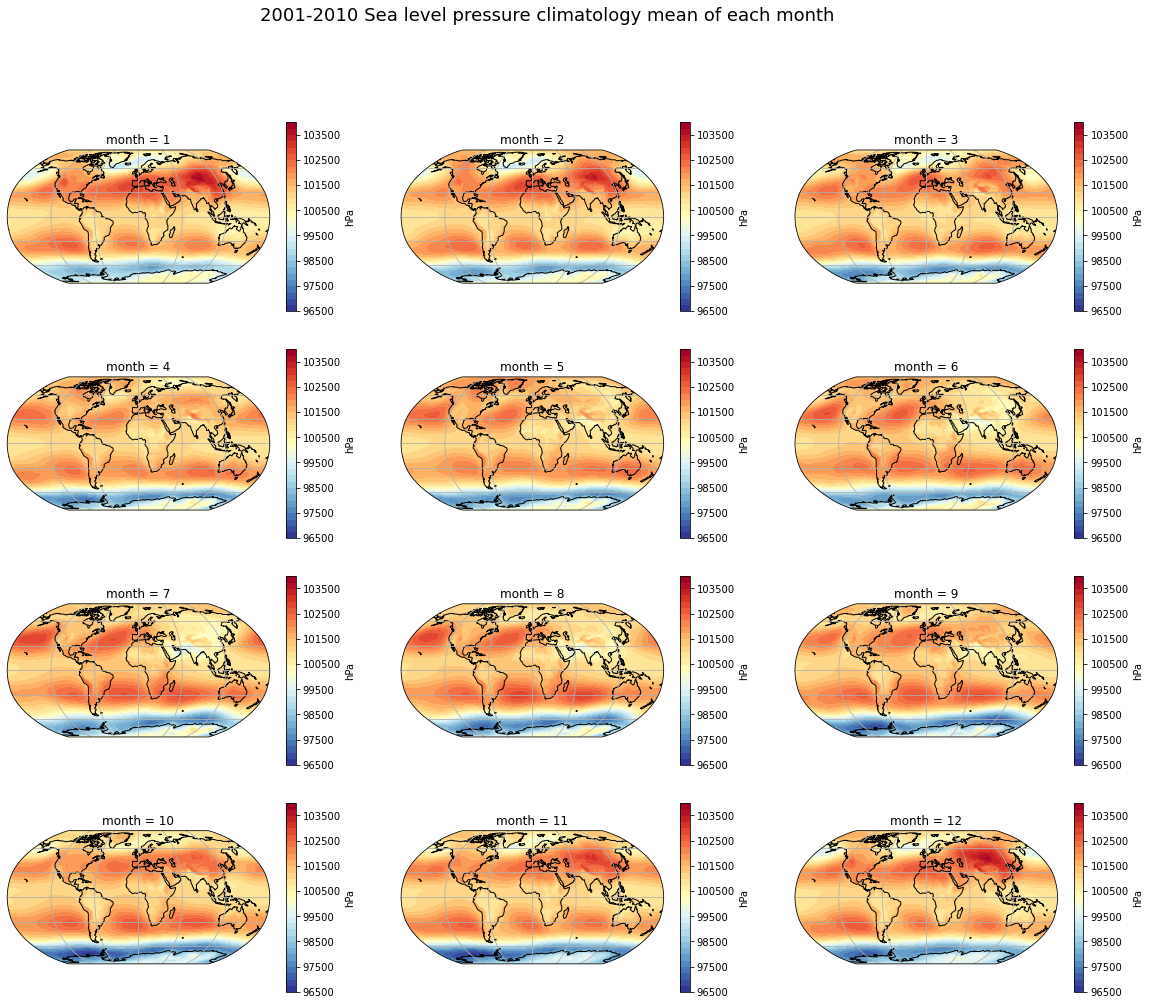

In [42]:
plt.figure(figsize=(20, 16))

for i in range(1,13):
    ax = plt.subplot(4, 3, i, projection=ccrs.Robinson())
    psl_mcy.sel(month=i).plot.contourf(ax=ax, transform=ccrs.PlateCarree(),levels=np.linspace(96500,104000,31),cmap='RdYlBu_r',cbar_kwargs={'label':'hPa'})
    ax.coastlines(); ax.gridlines();
    plt.title('month = %d'%i)

plt.suptitle('2001-2010 Sea level pressure climatology mean of each month',fontsize = 18);

## More examples from Pangeo gallery
- http://gallery.pangeo.io/index.html

## >>> Next: Your very own project! >>>

### Quick ideas
- Southern Oscillation Index (SOI): use the built-in interpolation function to find the sea level pressure at Tahiti and Darwin, Australia to calculate SOI (https://www.ncdc.noaa.gov/teleconnections/enso/indicators/soi/)
- etc.

## CMIP6 License